In [32]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [27]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,20.536458,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,15.952218,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


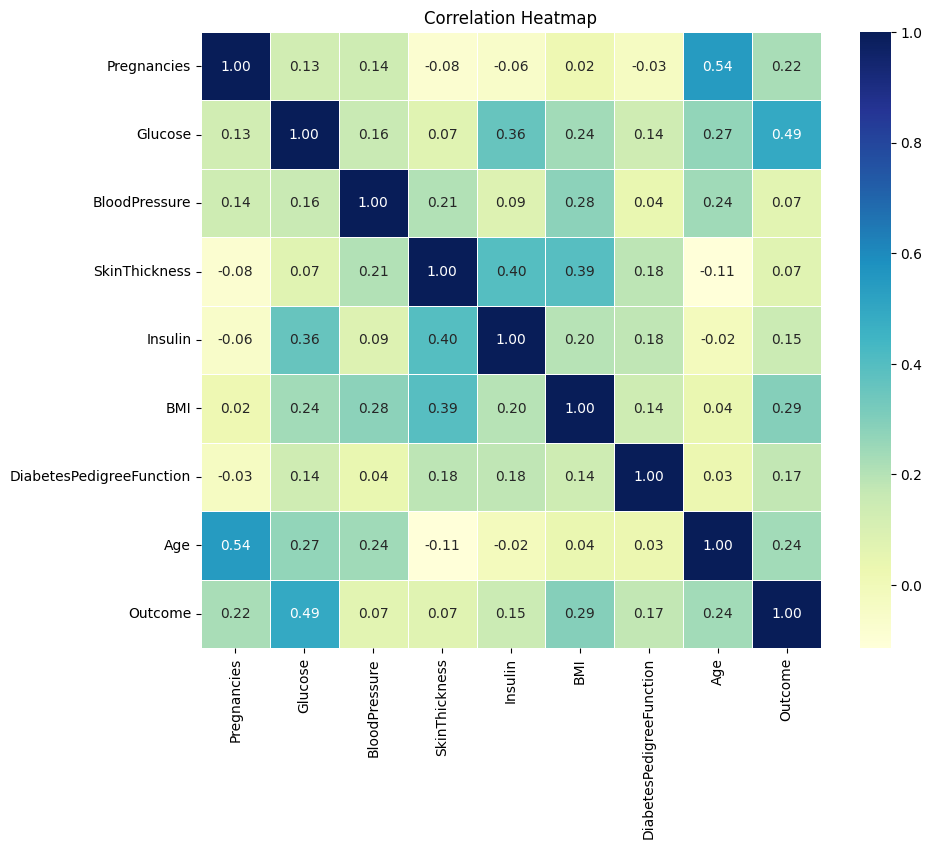

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap');

In [30]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
data.duplicated().sum()

0

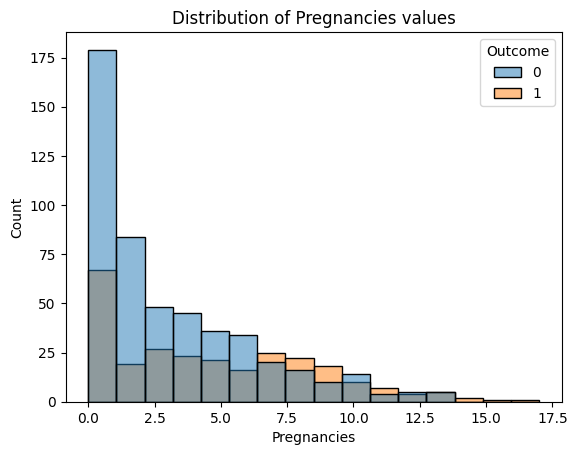

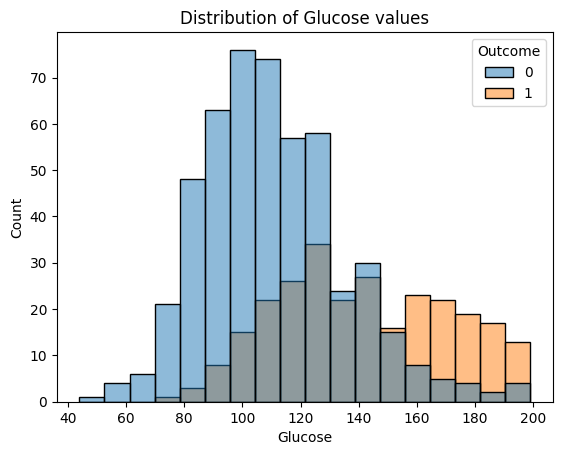

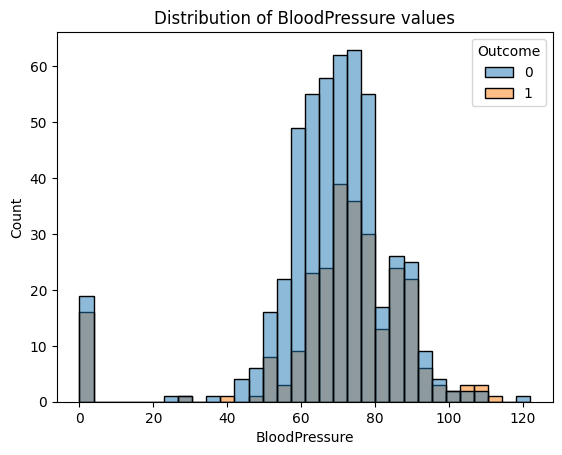

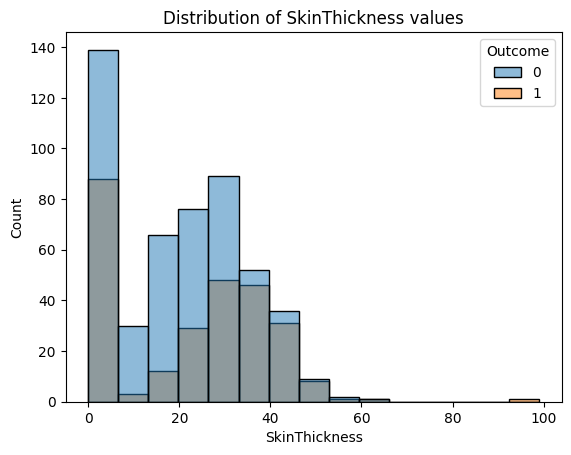

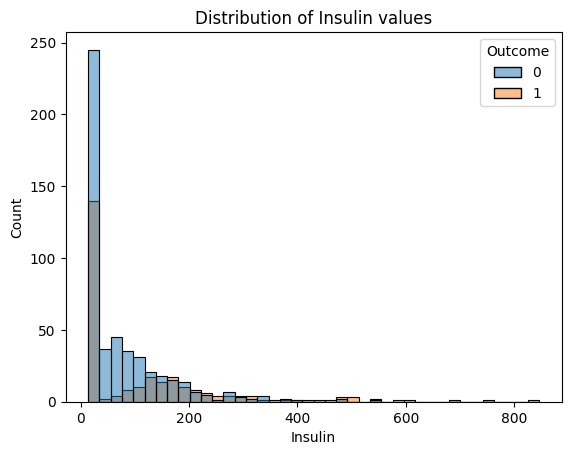

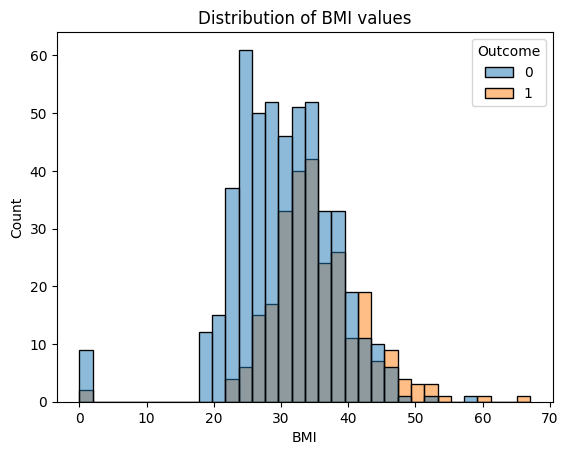

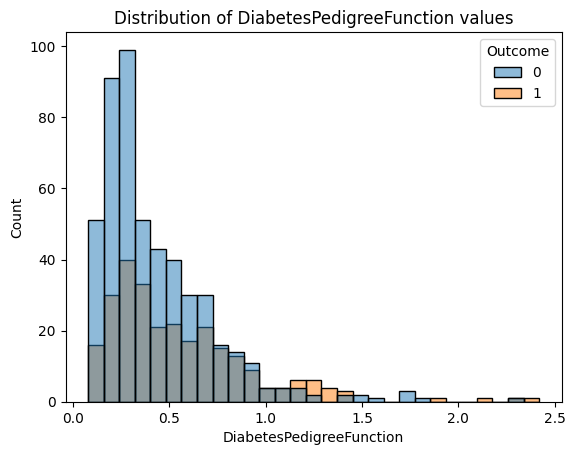

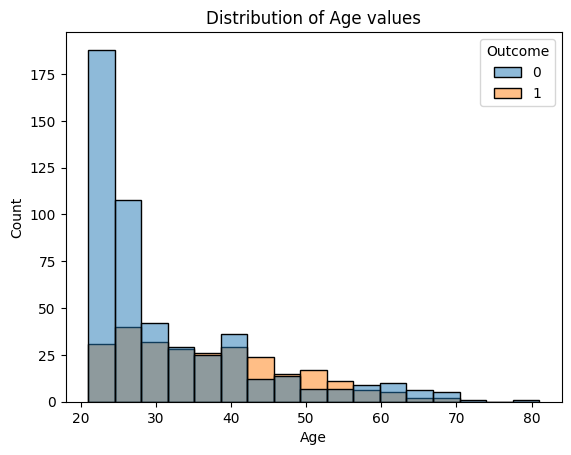

In [59]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in cols:
    sns.histplot(data=data,x=i,hue='Outcome')
    plt.title(f'Distribution of {i} values')
    plt.show()

In [4]:
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [5]:
import numpy as np
data['Glucose'] = np.where(data['Glucose']==0,data['Glucose'].median(),data['Glucose'])

In [6]:
data['Insulin'] = np.where(data['Insulin']==0,data['Insulin'].median(),data['Insulin'])

In [7]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35,30.5,33.6,0.627,50
1,1,85.0,66,29,30.5,26.6,0.351,31
2,8,183.0,64,0,30.5,23.3,0.672,32
3,1,89.0,66,23,94.0,28.1,0.167,21
4,0,137.0,40,35,168.0,43.1,2.288,33


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=6)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,criterion='entropy',max_features='sqrt',min_samples_leaf=10).fit(X_train,y_train)
pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_true=y_test,y_pred=pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7857142857142857
[[92 11]
 [22 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.72      0.57      0.64        51

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



<b style="color:green;background-color:white">Random Search</b>

In [12]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(200,2000,10)]

max_features = ['auto','sqrt','log2']

max_depth = [int(x) for x in np.linspace(10,1000,10)]

min_samples_split = [2,5,10,14]

min_samples_leaf = [1,2,4,6,8]

random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' : ['entropy','gini']
}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [13]:
rf = RandomForestClassifier()
rf_RandomCV = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=24,n_jobs=-1)

rf_RandomCV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=24, verbose=2)

In [14]:
rf_RandomCV.best_estimator_

RandomForestClassifier(max_depth=120, n_estimators=1200)

In [15]:
rf_RandomCV.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [16]:
print(accuracy_score(rf_RandomCV.predict(X_test),y_test))

0.7727272727272727


In [17]:
print(classification_report(rf_RandomCV.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       106
           1       0.63      0.67      0.65        48

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.77      0.77       154



<b style="color:green;background-color:white">Grid Search</b>

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':[rf_RandomCV.best_params_['criterion']],
    'max_features':[rf_RandomCV.best_params_['max_features']],
    'max_depth':[rf_RandomCV.best_params_['max_depth']],
    'min_samples_leaf':[rf_RandomCV.best_params_['min_samples_leaf'],
                        rf_RandomCV.best_params_['min_samples_leaf']+2,rf_RandomCV.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_RandomCV.best_params_['min_samples_split']-2,
                         rf_RandomCV.best_params_['min_samples_split']-1,
                         rf_RandomCV.best_params_['min_samples_split'],
                         rf_RandomCV.best_params_['min_samples_split']+1,
                         rf_RandomCV.best_params_['min_samples_split']+2],
    'n_estimators':[rf_RandomCV.best_params_['n_estimators']-200,
                    rf_RandomCV.best_params_['n_estimators']-100,
                    rf_RandomCV.best_params_['n_estimators'],
                    rf_RandomCV.best_params_['n_estimators']+100,
                    rf_RandomCV.best_params_['n_estimators']-200],
}

In [19]:
param_grid

{'criterion': ['gini'],
 'max_features': ['sqrt'],
 'max_depth': [120],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [0, 1, 2, 3, 4],
 'n_estimators': [1000, 1100, 1200, 1300, 1000]}

In [20]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1000, 1100, 1200, 1300, 1000]},
             verbose=2)

In [21]:
accuracy_score(y_pred=grid_search.predict(X_test),y_true=y_test)

0.7727272727272727

<b style="color:green;background-color:white">Bayesian Optimizer</b>

In [22]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

space = {
    'criterion': hp.choice('criterion', ['entropy', 'gini']),
    'max_depth': hp.quniform('max_depth', 10, 1200, 10),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'n_estimators': hp.choice('n_estimators', [10, 50, 300, 750, 1200, 1300, 1500])
}


def objective(space):
    model = RandomForestClassifier(
        criterion=space['criterion'],
        max_features=space['max_features'],
        max_depth=int(space['max_depth']), 
        min_samples_split=int(space['min_samples_split']),
        min_samples_leaf=int(space['min_samples_leaf']),  
        n_estimators=space['n_estimators']
    )

    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()

    return {'loss': -accuracy, 'status': STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=80,
    trials=trials
)

print(best)

100%|██████████| 80/80 [08:35<00:00,  6.45s/trial, best loss: -0.7687724910035986]
{'criterion': 1, 'max_depth': 20.0, 'max_features': 1, 'min_samples_leaf': 35.0, 'min_samples_split': 2.0, 'n_estimators': 0}


In [23]:
crit = {0:'entropy',1:'gini'}
feat = {0:'sqrt',1:'log2',2:None}
est = {0:10,1:50,2:300,3:750,4:1200,5:1300,6:1500}

In [24]:
bayesion_rf = RandomForestClassifier(criterion=crit[best['criterion']],n_estimators=est[best['n_estimators']],max_features=feat[best['max_features']],min_samples_leaf=int(best['min_samples_leaf']),min_samples_split=int(best['min_samples_split']),max_depth=int(best['max_depth'])).fit(X_train,y_train)

In [25]:
accuracy_score(y_pred=bayesion_rf.predict(X_test),y_true=y_test)

0.7597402597402597